In [1471]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import *
import seaborn as sns
from pandas import DataFrame
import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import preprocessing



## Prepare Factors

In [1472]:
factors_load = pd.read_csv(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Inputs\factors.csv')\

## Remove columns that could be null in 2023, and player names
factors_prep = factors_load.drop(['matches_y','year_int','predicted_year'], axis = 1)

## Split out 2023 factors to run through model
factors_prep_23 = factors_prep.query('year_played == 2023').drop(['avg_score'], axis = 1)

# # Drop nulls (165 rows dropped, leaving 2837 after removing Nulls)
factors_prep = factors_prep.dropna(axis= 0, how='any')
factors_prep_23 = factors_prep_23.dropna(axis= 0, how='any')

## Remove Player Name so it doesn't treat as dummy variable
factors = factors_prep.drop(['player_name'], axis = 1)
factors_23 = factors_prep_23.drop(['player_name'], axis = 1)

# ## Convert position variables into category column. Could also consider category_encoders sklearn package
factors['position_grouped'] = factors['position_grouped'].astype('category')

factors_23['position_grouped'] = factors_23['position_grouped'].astype('category')

# ## One hot encoding to convert category variables into dummy columns
factors = pd.get_dummies(factors)

factors_23 = pd.get_dummies(factors_23)


print(factors.shape)
print(factors_23.shape)


(1614, 181)
(491, 180)


## Load factors and limit data file to only those we want to focus on

In [1473]:
factors = factors[[
    'avg_score'
    ,'age_1yr'
    ,'years_active'
    ,'player_height_cm_1yr'
    ,'player_weight_kg_1yr'
    # ,'afl_fantasy_score_1yr'
    # ,'afl_fantasy_score_3yr'
    # ,'afl_fantasy_score_5yr'
    ,'fantasy_score_yearly_change'
    ,'fantasy_score_inyear_change'
    ,'kicks_1yr'
    ,'marks_1yr'
    ,'handballs_1yr'
    # ,'disposals_1yr'
    # ,'position_grouped_BP'
    # ,'position_grouped_C'
    # ,'position_grouped_CHB'
    # ,'position_grouped_CHF'
    # ,'position_grouped_FB'
    # ,'position_grouped_FF'
    # ,'position_grouped_FP'
    # ,'position_grouped_HBF'
    # ,'position_grouped_HFF'
    # ,'position_grouped_RUCK'
    # ,'position_grouped_W'
    # ,'effective_disposals_1yr'
    # ,'disposal_efficiency_percentage_1yr'
    ,'goals_1yr'
    ,'behinds_1yr' 
    ,'hitouts_1yr'
    ,'tackles_1yr'
    ,'rebounds_1yr'
    ,'inside_fifties_1yr'
    ,'clearances_1yr'
    ,'clangers_1yr'
    ,'free_kicks_for_1yr'
    ,'free_kicks_against_1yr'
    ,'brownlow_votes_1yr'
    ,'contested_possessions_1yr'
    ,'uncontested_possessions_1yr'
    ,'contested_marks_1yr'
    ,'marks_inside_fifty_1yr'
    ,'one_percenters_1yr'
    ,'bounces_1yr'
    ,'goal_assists_1yr'
    ,'time_on_ground_percentage_1yr'
    ,'centre_clearances_1yr'
    ,'stoppage_clearances_1yr'
    ,'score_involvements_1yr'
    ,'metres_gained_1yr'
    ,'turnovers_1yr'
    ,'intercepts_1yr'
    ,'tackles_inside_fifty_1yr'
    ,'contest_def_losses_1yr'
    ,'contest_def_one_on_ones_1yr'
    ,'contest_off_one_on_ones_1yr'
    ,'contest_off_wins_1yr'
    ,'def_half_pressure_acts_1yr'
    ,'effective_kicks_1yr'
    ,'f50_ground_ball_gets_1yr'
    ,'ground_ball_gets_1yr'
    ,'hitouts_to_advantage_1yr'
    ,'hitout_win_percentage_1yr'
    ,'intercept_marks_1yr'
    ,'marks_on_lead_1yr'
    ,'pressure_acts_1yr'
    ,'rating_points_1yr'
    ,'ruck_contests_1yr'
    ,'score_launches_1yr'
    ,'shots_at_goal_1yr'
    ,'spoils_1yr'
    # ,'kicks_3yr'
    # ,'marks_3yr'
    # ,'handballs_3yr'
    # ,'disposals_3yr'
    # ,'effective_disposals_3yr'
    # ,'disposal_efficiency_percentage_3yr'
    # ,'goals_3yr'
    # ,'behinds_3yr'
    # ,'hitouts_3yr'
    # ,'tackles_3yr'
    # ,'rebounds_3yr'
    # ,'inside_fifties_3yr'
    # ,'clearances_3yr'
    # ,'clangers_3yr'
    # ,'free_kicks_for_3yr'
    # ,'free_kicks_against_3yr'
    # ,'brownlow_votes_3yr'
    # ,'contested_possessions_3yr'
    # ,'uncontested_possessions_3yr'
    # ,'contested_marks_3yr'
    # ,'marks_inside_fifty_3yr'
    # ,'one_percenters_3yr'
    # ,'bounces_3yr'
    # ,'goal_assists_3yr'
    # ,'time_on_ground_percentage_3yr'
    # ,'centre_clearances_3yr'
    # ,'stoppage_clearances_3yr'
    # ,'score_involvements_3yr'
    # ,'metres_gained_3yr'
    # ,'turnovers_3yr'
    # ,'intercepts_3yr'
    # ,'tackles_inside_fifty_3yr'
    # ,'contest_def_losses_3yr'
    # ,'contest_def_one_on_ones_3yr'
    # ,'contest_off_one_on_ones_3yr'
    # ,'contest_off_wins_3yr'
    # ,'def_half_pressure_acts_3yr'
    # ,'effective_kicks_3yr'
    # ,'f50_ground_ball_gets_3yr'
    # ,'ground_ball_gets_3yr'
    # ,'hitouts_to_advantage_3yr'
    # ,'hitout_win_percentage_3yr'
    # ,'intercept_marks_3yr'
    # ,'marks_on_lead_3yr'
    # ,'pressure_acts_3yr'
    # ,'rating_points_3yr'
    # ,'ruck_contests_3yr'
    # ,'score_launches_3yr'
    # ,'shots_at_goal_3yr'
    # ,'spoils_3yr'
    # ,'kicks_5yr'
    # ,'marks_5yr'
    # ,'handballs_5yr'
    # ,'disposals_5yr'
    # ,'effective_disposals_5yr'
    # ,'disposal_efficiency_percentage_5yr'
    # ,'goals_5yr'
    # ,'behinds_5yr'
    # ,'hitouts_5yr'
    # ,'tackles_5yr'
    # ,'rebounds_5yr'
    # ,'inside_fifties_5yr'
    # ,'clearances_5yr'
    # ,'clangers_5yr'
    # ,'free_kicks_for_5yr'
    # ,'free_kicks_against_5yr'
    # ,'brownlow_votes_5yr'
    # ,'contested_possessions_5yr'
    # ,'uncontested_possessions_5yr'
    # ,'contested_marks_5yr'
    # ,'marks_inside_fifty_5yr'
    # ,'one_percenters_5yr'
    # ,'bounces_5yr'
    # ,'goal_assists_5yr'
    # ,'time_on_ground_percentage_5yr'
    # ,'centre_clearances_5yr'
    # ,'stoppage_clearances_5yr'
    # ,'score_involvements_5yr'
    # ,'metres_gained_5yr'
    # ,'turnovers_5yr'
    # ,'intercepts_5yr'
    # ,'tackles_inside_fifty_5yr'
    # ,'contest_def_losses_5yr'
    # ,'contest_def_one_on_ones_5yr'
    # ,'contest_off_one_on_ones_5yr'
    # ,'contest_off_wins_5yr'
    # ,'def_half_pressure_acts_5yr'
    # ,'effective_kicks_5yr'
    # ,'f50_ground_ball_gets_5yr'
    # ,'ground_ball_gets_5yr'
    # ,'hitouts_to_advantage_5yr'
    # ,'hitout_win_percentage_5yr'
    # ,'intercept_marks_5yr'
    # ,'marks_on_lead_5yr'
    # ,'pressure_acts_5yr'
    # ,'rating_points_5yr'
    # ,'ruck_contests_5yr'
    # ,'score_launches_5yr'
    # ,'shots_at_goal_5yr'
    # ,'spoils_5yr'
]]

factors

,avg_score,age_1yr,years_active,player_height_cm_1yr,player_weight_kg_1yr,fantasy_score_yearly_change,fantasy_score_inyear_change,kicks_1yr,marks_1yr,handballs_1yr,...,hitouts_to_advantage_1yr,hitout_win_percentage_1yr,intercept_marks_1yr,marks_on_lead_1yr,pressure_acts_1yr,rating_points_1yr,ruck_contests_1yr,score_launches_1yr,shots_at_goal_1yr,spoils_1yr
11,77.888889,21.0,7,193.0,92.0,10.475962,6.745455,10.000000,3.562500,7.750000,...,0.437500,6.250000,0.437500,0.000000,13.750000,8.900000,0.062500,1.062500,1.312500,0.500000
12,80.500000,22.0,7,193.0,92.0,7.742547,-14.000000,9.888889,4.500000,10.444444,...,0.000000,1.850000,0.611111,0.333333,17.277778,10.722222,0.388889,1.111111,0.888889,0.277778
14,86.250000,26.0,7,193.0,92.0,0.000000,-3.250000,10.222222,3.722222,7.666667,...,0.055556,6.038889,0.166667,0.055556,13.722222,6.422222,3.277778,0.666667,0.333333,0.888889
15,86.480000,27.0,7,193.0,92.0,9.565789,-5.222222,14.350000,5.750000,7.350000,...,0.000000,0.000000,0.850000,0.200000,14.000000,8.840000,0.000000,1.300000,0.800000,0.700000
22,72.900000,23.0,5,192.0,98.0,0.000000,-19.583333,8.636364,5.727273,7.636364,...,0.000000,0.000000,1.818182,0.000000,8.272727,9.581818,0.181818,0.636364,0.181818,6.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404,96.545455,28.0,10,175.0,77.0,10.952381,-6.709091,16.238095,3.761905,8.809524,...,0.000000,0.000000,0.190476,0.428571,26.809524,16.414286,0.047619,1.857143,3.285714,0.333333
6406,81.863636,32.0,10,175.0,77.0,0.000000,16.427273,16.782609,5.304348,7.347826,...,0.000000,0.000000,0.521739,0.434783,25.565217,16.226087,0.086957,2.043478,1.956522,0.391304
6407,84.450000,33.0,10,175.0,77.0,-12.736364,-20.411111,14.681818,5.772727,5.181818,...,0.000000,0.000000,0.636364,0.363636,14.545455,10.204545,0.000000,1.045455,0.863636,0.409091
6410,59.000000,23.0,4,190.0,91.0,0.000000,14.070707,8.150000,3.750000,3.600000,...,0.000000,0.000000,0.050000,0.900000,11.950000,7.340000,0.000000,0.500000,3.100000,0.400000


In [1474]:
factors_23 = factors_23[[
     'age_1yr'
    ,'years_active'
    ,'player_height_cm_1yr'
    ,'player_weight_kg_1yr'
    # ,'afl_fantasy_score_1yr'
    # ,'afl_fantasy_score_3yr'
    # ,'afl_fantasy_score_5yr'
    ,'fantasy_score_yearly_change'
    ,'fantasy_score_inyear_change'
    ,'kicks_1yr'
    ,'marks_1yr'
    ,'handballs_1yr'
    # ,'disposals_1yr'
    # ,'position_grouped_BP'
    # ,'position_grouped_C'
    # ,'position_grouped_CHB'
    # ,'position_grouped_CHF'
    # ,'position_grouped_FB'
    # ,'position_grouped_FF'
    # ,'position_grouped_FP'
    # ,'position_grouped_HBF'
    # ,'position_grouped_HFF'
    # ,'position_grouped_RUCK'
    # ,'position_grouped_W'
    # ,'effective_disposals_1yr'
    # ,'disposal_efficiency_percentage_1yr'
    ,'goals_1yr'
    ,'behinds_1yr' 
    ,'hitouts_1yr'
    ,'tackles_1yr'
    ,'rebounds_1yr'
    ,'inside_fifties_1yr'
    ,'clearances_1yr'
    ,'clangers_1yr'
    ,'free_kicks_for_1yr'
    ,'free_kicks_against_1yr'
    ,'brownlow_votes_1yr'
    ,'contested_possessions_1yr'
    ,'uncontested_possessions_1yr'
    ,'contested_marks_1yr'
    ,'marks_inside_fifty_1yr'
    ,'one_percenters_1yr'
    ,'bounces_1yr'
    ,'goal_assists_1yr'
    ,'time_on_ground_percentage_1yr'
    ,'centre_clearances_1yr'
    ,'stoppage_clearances_1yr'
    ,'score_involvements_1yr'
    ,'metres_gained_1yr'
    ,'turnovers_1yr'
    ,'intercepts_1yr'
    ,'tackles_inside_fifty_1yr'
    ,'contest_def_losses_1yr'
    ,'contest_def_one_on_ones_1yr'
    ,'contest_off_one_on_ones_1yr'
    ,'contest_off_wins_1yr'
    ,'def_half_pressure_acts_1yr'
    ,'effective_kicks_1yr'
    ,'f50_ground_ball_gets_1yr'
    ,'ground_ball_gets_1yr'
    ,'hitouts_to_advantage_1yr'
    ,'hitout_win_percentage_1yr'
    ,'intercept_marks_1yr'
    ,'marks_on_lead_1yr'
    ,'pressure_acts_1yr'
    ,'rating_points_1yr'
    ,'ruck_contests_1yr'
    ,'score_launches_1yr'
    ,'shots_at_goal_1yr'
    ,'spoils_1yr'
    # ,'kicks_3yr'
    # ,'marks_3yr'
    # ,'handballs_3yr'
    # ,'disposals_3yr'
    # ,'effective_disposals_3yr'
    # ,'disposal_efficiency_percentage_3yr'
    # ,'goals_3yr'
    # ,'behinds_3yr'
    # ,'hitouts_3yr'
    # ,'tackles_3yr'
    # ,'rebounds_3yr'
    # ,'inside_fifties_3yr'
    # ,'clearances_3yr'
    # ,'clangers_3yr'
    # ,'free_kicks_for_3yr'
    # ,'free_kicks_against_3yr'
    # ,'brownlow_votes_3yr'
    # ,'contested_possessions_3yr'
    # ,'uncontested_possessions_3yr'
    # ,'contested_marks_3yr'
    # ,'marks_inside_fifty_3yr'
    # ,'one_percenters_3yr'
    # ,'bounces_3yr'
    # ,'goal_assists_3yr'
    # ,'time_on_ground_percentage_3yr'
    # ,'centre_clearances_3yr'
    # ,'stoppage_clearances_3yr'
    # ,'score_involvements_3yr'
    # ,'metres_gained_3yr'
    # ,'turnovers_3yr'
    # ,'intercepts_3yr'
    # ,'tackles_inside_fifty_3yr'
    # ,'contest_def_losses_3yr'
    # ,'contest_def_one_on_ones_3yr'
    # ,'contest_off_one_on_ones_3yr'
    # ,'contest_off_wins_3yr'
    # ,'def_half_pressure_acts_3yr'
    # ,'effective_kicks_3yr'
    # ,'f50_ground_ball_gets_3yr'
    # ,'ground_ball_gets_3yr'
    # ,'hitouts_to_advantage_3yr'
    # ,'hitout_win_percentage_3yr'
    # ,'intercept_marks_3yr'
    # ,'marks_on_lead_3yr'
    # ,'pressure_acts_3yr'
    # ,'rating_points_3yr'
    # ,'ruck_contests_3yr'
    # ,'score_launches_3yr'
    # ,'shots_at_goal_3yr'
    # ,'spoils_3yr'
    # ,'kicks_5yr'
    # ,'marks_5yr'
    # ,'handballs_5yr'
    # ,'disposals_5yr'
    # ,'effective_disposals_5yr'
    # ,'disposal_efficiency_percentage_5yr'
    # ,'goals_5yr'
    # ,'behinds_5yr'
    # ,'hitouts_5yr'
    # ,'tackles_5yr'
    # ,'rebounds_5yr'
    # ,'inside_fifties_5yr'
    # ,'clearances_5yr'
    # ,'clangers_5yr'
    # ,'free_kicks_for_5yr'
    # ,'free_kicks_against_5yr'
    # ,'brownlow_votes_5yr'
    # ,'contested_possessions_5yr'
    # ,'uncontested_possessions_5yr'
    # ,'contested_marks_5yr'
    # ,'marks_inside_fifty_5yr'
    # ,'one_percenters_5yr'
    # ,'bounces_5yr'
    # ,'goal_assists_5yr'
    # ,'time_on_ground_percentage_5yr'
    # ,'centre_clearances_5yr'
    # ,'stoppage_clearances_5yr'
    # ,'score_involvements_5yr'
    # ,'metres_gained_5yr'
    # ,'turnovers_5yr'
    # ,'intercepts_5yr'
    # ,'tackles_inside_fifty_5yr'
    # ,'contest_def_losses_5yr'
    # ,'contest_def_one_on_ones_5yr'
    # ,'contest_off_one_on_ones_5yr'
    # ,'contest_off_wins_5yr'
    # ,'def_half_pressure_acts_5yr'
    # ,'effective_kicks_5yr'
    # ,'f50_ground_ball_gets_5yr'
    # ,'ground_ball_gets_5yr'
    # ,'hitouts_to_advantage_5yr'
    # ,'hitout_win_percentage_5yr'
    # ,'intercept_marks_5yr'
    # ,'marks_on_lead_5yr'
    # ,'pressure_acts_5yr'
    # ,'rating_points_5yr'
    # ,'ruck_contests_5yr'
    # ,'score_launches_5yr'
    # ,'shots_at_goal_5yr'
    # ,'spoils_5yr'
    ]]

factors_23

,age_1yr,years_active,player_height_cm_1yr,player_weight_kg_1yr,fantasy_score_yearly_change,fantasy_score_inyear_change,kicks_1yr,marks_1yr,handballs_1yr,goals_1yr,...,hitouts_to_advantage_1yr,hitout_win_percentage_1yr,intercept_marks_1yr,marks_on_lead_1yr,pressure_acts_1yr,rating_points_1yr,ruck_contests_1yr,score_launches_1yr,shots_at_goal_1yr,spoils_1yr
16,28.0,7,193.0,92.0,5.908571,-5.461538,12.760000,5.480000,10.280000,0.400000,...,0.0,0.0,0.960000,0.000000,14.680000,10.684000,0.0,1.400000,0.960000,1.120000
36,30.0,10,181.0,85.0,-8.173123,14.572650,9.652174,3.391304,8.782609,0.565217,...,0.0,0.0,0.086957,0.304348,18.782609,9.639130,0.0,1.391304,1.260870,0.130435
58,26.0,6,183.0,80.0,3.527778,41.500000,6.750000,3.500000,3.750000,0.500000,...,0.0,0.0,0.500000,0.250000,9.666667,6.558333,0.0,0.250000,1.166667,0.916667
63,25.0,5,178.0,77.0,0.628571,8.634615,10.857143,4.761905,6.809524,1.000000,...,0.0,0.0,0.190476,0.761905,13.809524,9.995238,0.0,0.761905,2.095238,0.285714
71,28.0,8,183.0,83.0,0.092308,3.000000,11.200000,4.000000,8.600000,0.200000,...,0.0,0.0,0.650000,0.050000,13.150000,8.745000,0.0,1.000000,0.500000,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,25.0,1,196.0,97.0,0.000000,4.474359,6.789474,2.894737,2.526316,0.000000,...,0.0,0.0,1.315789,0.000000,6.631579,7.994737,0.0,0.789474,0.000000,7.105263
6386,25.0,3,195.0,91.0,0.877273,0.760684,7.454545,5.454545,4.681818,0.000000,...,0.0,0.0,2.181818,0.000000,6.545455,9.959091,0.0,1.181818,0.000000,6.363636
6398,32.0,12,188.0,89.0,5.329912,-25.783333,17.681818,6.772727,4.500000,0.045455,...,0.0,0.0,1.909091,0.045455,7.681818,8.490909,0.0,1.181818,0.272727,2.454545
6408,34.0,10,175.0,77.0,-7.026923,2.263889,13.600000,5.900000,5.300000,0.400000,...,0.0,0.0,0.050000,0.300000,16.050000,8.690000,0.0,1.050000,0.950000,0.400000


<!-- y = factors['avg_score']
<!-- 
X = factors [
     'years_active'
    ,'position_grouped' 
    ,'player_height_cm_1yr'
    ,'player_weight_kg_1yr'
    ,'afl_fantasy_score_1yr'
    ,'afl_fantasy_score_3yr'
    ,'afl_fantasy_score_5yr'
    ,'position_grouped_FB'
    ,'position_grouped_BP'
    ,'position_grouped_CHB'
    ,'position_grouped_HBF'
    ,'position_grouped_RUCK'
    ,'position_grouped_C'
    ,'position_grouped_W'
    ,'position_grouped_FF'
    ,'position_grouped_FP'
    ,'position_grouped_HFF'
    ,'position_grouped_CHF' 


X = factors [
    ,'years_active'
    ,'player_height_cm_1yr'
    ,'player_weight_kg_1yr'
    ,'kicks_1yr'
    ,'marks_1yr'
    ,'handballs_1yr'
    ,'disposals_1yr'
    ,'effective_disposals_1yr'
    ,'disposal_efficiency_percentage_1yr'
    ,'goals_1yr'
    ,'behinds_1yr' 
    ,'hitouts_1yr'
    ,'tackles_1yr'
    ,'rebounds_1yr'
    ,'inside_fifties_1yr'
    ,'clearances_1yr'
    ,'clangers_1yr'
    ,'free_kicks_for_1yr'
    ,'free_kicks_against_1yr'
    ,'brownlow_votes_1yr'
    ,'contested_possessions_1yr'
    ,'uncontested_possessions_1yr'
    ,'contested_marks_1yr'
    ,'marks_inside_fifty_1yr'
    ,'one_percenters_1yr'
    ,'bounces_1yr'
    ,'goal_assists_1yr'
    ,'time_on_ground_percentage_1yr'
    ,'centre_clearances_1yr'
    ,'stoppage_clearances_1yr'
    ,'score_involvements_1yr'
    ,'metres_gained_1yr'
    ,'turnovers_1yr'
    ,'intercepts_1yr'
    ,'tackles_inside_fifty_1yr'
    ,'contest_def_losses_1yr'
    ,'contest_def_one_on_ones_1yr'
    ,'contest_off_one_on_ones_1yr'
    ,'contest_off_wins_1yr'
    ,'def_half_pressure_acts_1yr'
    ,'effective_kicks_1yr'
    ,'f50_ground_ball_gets_1yr'
    ,'ground_ball_gets_1yr'
    ,'hitouts_to_advantage_1yr'
    ,'hitout_win_percentage_1yr'
    ,'intercept_marks_1yr'
    ,'marks_on_lead_1yr'
    ,'pressure_acts_1yr'
    ,'rating_points_1yr'
    ,'ruck_contests_1yr'
    ,'score_launches_1yr'
    ,'shots_at_goal_1yr'
    ,'spoils_1yr'
    ,'player_height_cm_3yr'
    ,'player_weight_kg_3yr'
    ,'kicks_3yr'
    ,'marks_3yr'
    ,'handballs_3yr'
    ,'disposals_3yr'
    ,'effective_disposals_3yr'
    ,'disposal_efficiency_percentage_3yr'
    ,'goals_3yr'
    ,'behinds_3yr'
    ,'hitouts_3yr'
    ,'tackles_3yr'
    ,'rebounds_3yr'
    ,'inside_fifties_3yr'
    ,'clearances_3yr'
    ,'clangers_3yr'
    ,'free_kicks_for_3yr'
    ,'free_kicks_against_3yr'
    ,'brownlow_votes_3yr'
    ,'contested_possessions_3yr'
    ,'uncontested_possessions_3yr'
    ,'contested_marks_3yr'
    ,'marks_inside_fifty_3yr'
    ,'one_percenters_3yr'
    ,'bounces_3yr'
    ,'goal_assists_3yr'
    ,'time_on_ground_percentage_3yr'
    ,'centre_clearances_3yr'
    ,'stoppage_clearances_3yr'
    ,'score_involvements_3yr'
    ,'metres_gained_3yr'
    ,'turnovers_3yr'
    ,'intercepts_3yr'
    ,'tackles_inside_fifty_3yr'
    ,'contest_def_losses_3yr'
    ,'contest_def_one_on_ones_3yr'
    ,'contest_off_one_on_ones_3yr'
    ,'contest_off_wins_3yr'
    ,'def_half_pressure_acts_3yr'
    ,'effective_kicks_3yr'
    ,'f50_ground_ball_gets_3yr'
    ,'ground_ball_gets_3yr'
    ,'hitouts_to_advantage_3yr'
    ,'hitout_win_percentage_3yr'
    ,'intercept_marks_3yr'
    ,'marks_on_lead_3yr'
    ,'pressure_acts_3yr'
    ,'rating_points_3yr'
    ,'ruck_contests_3yr'
    ,'score_launches_3yr'
    ,'shots_at_goal_3yr'
    ,'spoils_3yr'
    ,'player_height_cm_5yr'
    ,'player_weight_kg_5yr'
    ,'kicks_5yr'
    ,'marks_5yr'
    ,'handballs_5yr'
    ,'disposals_5yr'
    ,'effective_disposals_5yr'
    ,'disposal_efficiency_percentage_5yr'
    ,'goals_5yr'
    ,'behinds_5yr'
    ,'hitouts_5yr'
    ,'tackles_5yr'
    ,'rebounds_5yr'
    ,'inside_fifties_5yr'
    ,'clearances_5yr'
    ,'clangers_5yr'
    ,'free_kicks_for_5yr'
    ,'free_kicks_against_5yr'
    ,'brownlow_votes_5yr'
    ,'contested_possessions_5yr'
    ,'uncontested_possessions_5yr'
    ,'contested_marks_5yr'
    ,'marks_inside_fifty_5yr'
    ,'one_percenters_5yr'
    ,'bounces_5yr'
    ,'goal_assists_5yr'
    ,'time_on_ground_percentage_5yr'
    ,'centre_clearances_5yr'
    ,'stoppage_clearances_5yr'
    ,'score_involvements_5yr'
    ,'metres_gained_5yr'
    ,'turnovers_5yr'
    ,'intercepts_5yr'
    ,'tackles_inside_fifty_5yr'
    ,'contest_def_losses_5yr'
    ,'contest_def_one_on_ones_5yr'
    ,'contest_off_one_on_ones_5yr'
    ,'contest_off_wins_5yr'
    ,'def_half_pressure_acts_5yr'
    ,'effective_kicks_5yr'
    ,'f50_ground_ball_gets_5yr'
    ,'ground_ball_gets_5yr'
    ,'hitouts_to_advantage_5yr'
    ,'hitout_win_percentage_5yr'
    ,'intercept_marks_5yr'
    ,'marks_on_lead_5yr'
    ,'pressure_acts_5yr'
    ,'rating_points_5yr'
    ,'ruck_contests_5yr'
    ,'score_launches_5yr'
    ,'shots_at_goal_5yr'
    ,'spoils_5yr'
    ,'position_grouped_FB'
    ,'position_grouped_BP'
    ,'position_grouped_CHB'
    ,'position_grouped_HBF'
    ,'position_grouped_RUCK'
    ,'position_grouped_C'
    ,'position_grouped_W'
    ,'position_grouped_FF'
    ,'position_grouped_FP'
    ,'position_grouped_HFF'
    ,'position_grouped_CHF']
    .drop()
  -->

In [1475]:
y = factors['avg_score']

X = factors.drop(['avg_score'], axis = 1)

X_new = factors_23

## Standardise factors between 0 and 1
scaler = preprocessing.MinMaxScaler()

d = scaler.fit_transform(X)
X = pd.DataFrame(d, columns=X.columns)

## Scale 2023 factors for predictions as well
d_new = scaler.fit_transform(X_new)
X_new = pd.DataFrame(d_new, columns=X_new.columns)


In [1476]:
X_new

,age_1yr,years_active,player_height_cm_1yr,player_weight_kg_1yr,fantasy_score_yearly_change,fantasy_score_inyear_change,kicks_1yr,marks_1yr,handballs_1yr,goals_1yr,...,hitouts_to_advantage_1yr,hitout_win_percentage_1yr,intercept_marks_1yr,marks_on_lead_1yr,pressure_acts_1yr,rating_points_1yr,ruck_contests_1yr,score_launches_1yr,shots_at_goal_1yr,spoils_1yr
0,0.529412,0.545455,0.550,0.536585,0.764041,0.451714,0.618288,0.522072,0.508674,0.115789,...,0.0,0.0,0.250909,0.000000,0.424819,0.520223,0.0,0.403846,0.163721,0.116480
1,0.647059,0.818182,0.250,0.365854,0.584772,0.626177,0.445073,0.298619,0.422899,0.163616,...,0.0,0.0,0.022727,0.145257,0.582275,0.457549,0.0,0.401338,0.215032,0.013565
2,0.411765,0.454545,0.300,0.243902,0.733732,0.860668,0.283320,0.310248,0.134615,0.144737,...,0.0,0.0,0.130682,0.119318,0.232409,0.272754,0.0,0.072115,0.198966,0.095333
3,0.352941,0.363636,0.175,0.170732,0.696823,0.574467,0.512232,0.445249,0.309875,0.289474,...,0.0,0.0,0.049784,0.363636,0.391410,0.478909,0.0,0.219780,0.357327,0.029714
4,0.529412,0.636364,0.300,0.317073,0.689996,0.525399,0.531341,0.363739,0.412439,0.057895,...,0.0,0.0,0.169886,0.023864,0.366098,0.403916,0.0,0.288462,0.085271,0.072800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.352941,0.000000,0.625,0.658537,0.688821,0.538238,0.285520,0.245495,0.064519,0.000000,...,0.0,0.0,0.343900,0.000000,0.115924,0.358914,0.0,0.227733,0.000000,0.738947
487,0.352941,0.181818,0.600,0.512195,0.699989,0.505899,0.322588,0.519349,0.187993,0.000000,...,0.0,0.0,0.570248,0.000000,0.112619,0.476741,0.0,0.340909,0.000000,0.661818
488,0.764706,1.000000,0.425,0.463415,0.756674,0.274746,0.892605,0.660371,0.177578,0.013158,...,0.0,0.0,0.498967,0.021694,0.156232,0.388675,0.0,0.340909,0.046512,0.255273
489,0.882353,0.818182,0.100,0.170732,0.599363,0.518989,0.665105,0.567005,0.223404,0.115789,...,0.0,0.0,0.013068,0.143182,0.477399,0.400617,0.0,0.302885,0.162016,0.041600


In [1477]:
# Load model

from sklearn.model_selection import train_test_split

pd.DataFrame(X).fillna(0)

X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.70, 
    random_state = 1)


from sklearn.linear_model import LinearRegression

lr = LinearRegression()

## Build the model using the training data.

lr.fit(X_train,y_train)

LinearRegression()

In [1478]:
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()


Feature: 0, Score: -14.91504
Feature: 1, Score: 5.77053
Feature: 2, Score: 0.29494
Feature: 3, Score: 2.92020
Feature: 4, Score: -14.45526
Feature: 5, Score: 1.18789
Feature: 6, Score: 4.80331
Feature: 7, Score: -2.46540
Feature: 8, Score: 7.69465
Feature: 9, Score: 1.15567
Feature: 10, Score: 2.10773
Feature: 11, Score: 130.09486
Feature: 12, Score: 21.08861
Feature: 13, Score: 5.72628
Feature: 14, Score: -15.48960
Feature: 15, Score: 56.18031
Feature: 16, Score: 1.07447
Feature: 17, Score: -7.00670
Feature: 18, Score: -1.92642
Feature: 19, Score: -7.09874
Feature: 20, Score: 56.87061
Feature: 21, Score: 37.36203
Feature: 22, Score: -1.09990
Feature: 23, Score: -9.93600
Feature: 24, Score: -9.01628
Feature: 25, Score: 1.91996
Feature: 26, Score: -0.06699
Feature: 27, Score: -12.25969
Feature: 28, Score: -34.02972
Feature: 29, Score: -39.11992
Feature: 30, Score: 16.39312
Feature: 31, Score: 5.16279
Feature: 32, Score: -11.63377
Feature: 33, Score: -17.31935
Feature: 34, Score: 2.65053

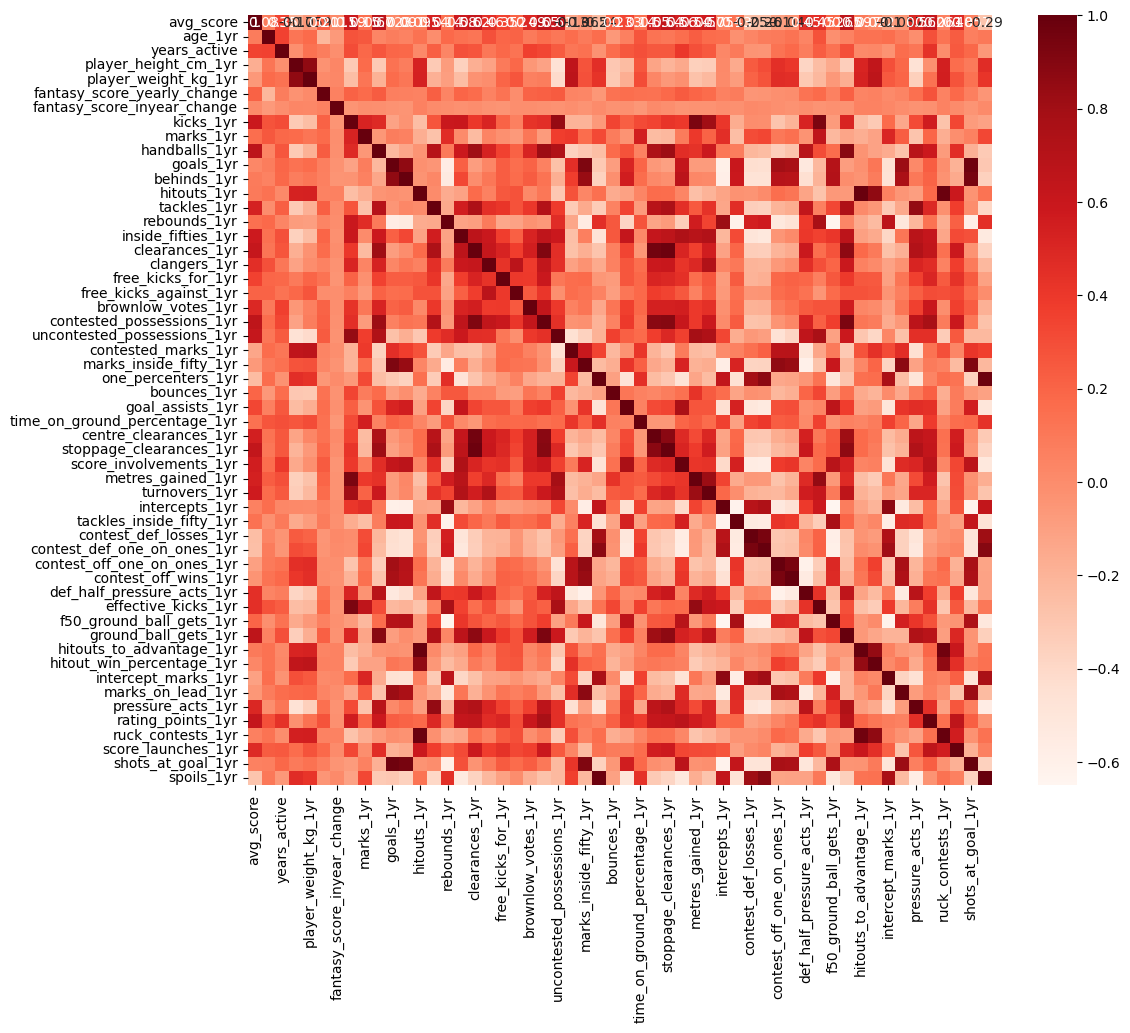

In [1479]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = factors.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [1480]:
import statsmodels.api as sm
#Correlation with output variable
cor_target = abs(cor["avg_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

avg_score                      1.000000
kicks_1yr                      0.592488
handballs_1yr                  0.667251
tackles_1yr                    0.535053
inside_fifties_1yr             0.575845
clearances_1yr                 0.616787
contested_possessions_1yr      0.654640
uncontested_possessions_1yr    0.613967
centre_clearances_1yr          0.547060
stoppage_clearances_1yr        0.635336
score_involvements_1yr         0.557252
metres_gained_1yr              0.541079
turnovers_1yr                  0.573327
ground_ball_gets_1yr           0.654941
pressure_acts_1yr              0.500898
rating_points_1yr              0.623501
Name: avg_score, dtype: float64

In [1481]:
## Test data error
lr.score(X_test, y_test).round(3)


0.617

In [1482]:
## Train data error
lr.score(X_train, y_train).round(3)

0.695

In [1483]:
#predict y-value based on testing data
y_pred = lr.predict(X_test)

#comparing y-value actual and prediction of testing data
df_compare = pd.DataFrame({'Actual' : y_test, 'Prediction': y_pred})

model_output = df_compare.join(factors, lsuffix='_caller', rsuffix='_other', how='inner')

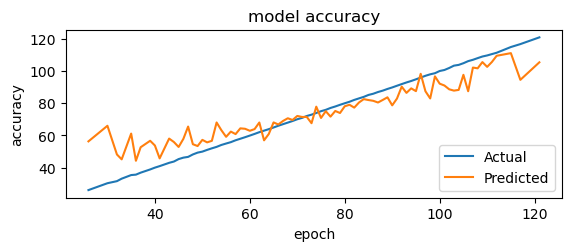

In [1484]:
y_test_df = pd.DataFrame({'Predicted' : y_test})

acc_chart = model_output.groupby(round(model_output['Actual'])).agg({'Prediction': 'mean', 'Actual': 'mean'})

# acc_chart.sort_values(by=['Actual'], ascending=True)

plt.subplot(2,1,1)
plt.plot(acc_chart['Actual'])
plt.plot(acc_chart['Prediction'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Actual', 'Predicted'], loc='lower right')


In [1485]:

#predict using new data 
y_pred_new = lr.predict(X_new)
y_pred_new = pd.DataFrame({'Predicted' : y_pred_new})

X_new_reset = X_new.reset_index()
factors_23_reset = factors_prep_23.reset_index()

pred_output = y_pred_new.join(factors_23_reset, lsuffix='_caller', rsuffix='_other', how='left')

# Write predictions to csv
# pred_output.to_csv(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Outputs\Model_pred.csv')

print(factors_prep_23.shape)
print(X_new.shape)

(491, 171)
(491, 53)


In [1486]:
## Sort by highest predicted score
pd.set_option('display.max_rows', 50)

pred_output['upside'] = pred_output['Predicted'] - pred_output['afl_fantasy_score_1yr']

pred_output[['player_name','age_1yr', 'position_grouped','matches_x','Predicted','afl_fantasy_score_1yr', 'upside']]\
.sort_values(by=['Predicted'], ascending=False).head(20)

# .query('position_grouped in "RUCK"')\

,player_name,age_1yr,position_grouped,matches_x,Predicted,afl_fantasy_score_1yr,upside
242,"Laird, Rory",30.0,C,22,120.252379,109.227273,11.025106
166,"Green, Tom",22.0,C,22,119.312224,108.727273,10.584951
107,"Daicos, Nick",20.0,HBF,22,118.334059,108.409091,9.924968
38,"Bontempelli, Marcus",28.0,C,23,117.789080,116.956522,0.832558
438,"Taranto, Tim",25.0,C,23,115.482043,112.434783,3.047260
355,"Petracca, Christian",27.0,C,25,115.010059,104.720000,10.290059
454,"Walsh, Sam",23.0,C,18,113.174364,97.944444,15.229920
344,"Parish, Darcy",26.0,C,18,112.860168,106.888889,5.971279
115,"Davies-Uniacke, Luke",24.0,C,14,112.087075,97.428571,14.658504
322,"Nankervis, Toby",29.0,RUCK,15,112.023162,102.266667,9.756496


In [1487]:
pred_output[['player_name','age_1yr', 'matches_x','Predicted','afl_fantasy_score_1yr', 'upside']].sort_values(by=['afl_fantasy_score_1yr'], ascending=False).head(20)

,player_name,age_1yr,matches_x,Predicted,afl_fantasy_score_1yr,upside
136,"English, Tim",26.0,23,102.055476,118.695652,-16.640177
38,"Bontempelli, Marcus",28.0,23,117.789080,116.956522,0.832558
269,"Marshall, Rowan",28.0,24,108.909220,116.750000,-7.840780
339,"Oliver, Clayton",26.0,15,110.830999,115.066667,-4.235667
116,"Dawson, Jordan",26.0,23,110.277756,113.434783,-3.157026
306,"Merrett, Zach",28.0,22,110.156191,112.863636,-2.707445
438,"Taranto, Tim",25.0,23,115.482043,112.434783,3.047260
174,"Gulden, Errol",21.0,24,105.275089,112.250000,-6.974911
43,"Brayshaw, Andrew",24.0,23,111.173702,110.347826,0.825876
242,"Laird, Rory",30.0,22,120.252379,109.227273,11.025106


In [1488]:
pred_output[['player_name','age_1yr', 'matches_x','Predicted','afl_fantasy_score_1yr', 'upside']].sort_values(by=['upside'], ascending=False)\
    .query('Predicted >= 70').head(20)

,player_name,age_1yr,matches_x,Predicted,afl_fantasy_score_1yr,upside
482,"Xerri, Tristan",24.0,9,88.156151,66.000000,22.156151
101,"Cunnington, Ben",32.0,9,83.359163,63.000000,20.359163
94,"Cripps, Patrick",28.0,24,106.288885,87.500000,18.788885
192,"Hickey, Tom",32.0,12,83.634927,65.333333,18.301594
343,"Parfitt, Brandan",25.0,9,72.453762,55.111111,17.342651
427,"Stanley, Rhys",33.0,13,86.913385,71.307692,15.605692
454,"Walsh, Sam",23.0,18,113.174364,97.944444,15.229920
423,"Soligo, Jake",20.0,21,82.579693,67.571429,15.008264
367,"Powell-Pepper, Sam",25.0,25,75.194905,60.520000,14.674905
115,"Davies-Uniacke, Luke",24.0,14,112.087075,97.428571,14.658504


Text(0.5, 0, 'Pred Upside')

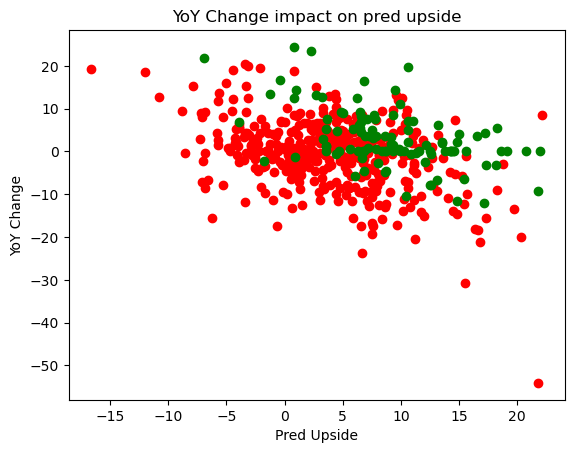

In [1489]:

pred_output_chart_U22 = pred_output.query('age_1yr <= 22')\
# .groupby(round(pred_output['fantasy_score_yearly_change'])).agg({'upside': 'mean', 'fantasy_score_yearly_change': 'mean'})

pred_output_chart_O22 = pred_output.query('age_1yr > 22')\
# .groupby(round(pred_output['fantasy_score_yearly_change'])).agg({'upside': 'mean', 'fantasy_score_yearly_change': 'mean'})



plt.scatter(pred_output_chart_O22['upside'], pred_output_chart_O22['fantasy_score_yearly_change'], c='red')
plt.scatter(pred_output_chart_U22['upside'], pred_output_chart_U22['fantasy_score_yearly_change'], c='green')
plt.title('YoY Change impact on pred upside')
plt.ylabel('YoY Change')
plt.xlabel('Pred Upside')

# plt.subplot(2,1,1)
# plt.plot(pred_output_chart['fantasy_score_yearly_change'])
# plt.plot(pred_output_chart['upside'])
# plt.title('YoY Change impact on pred upside')
# plt.ylabel('YoY change')
# plt.xlabel('Upside')
# plt.legend(['train', 'test'], loc='lower right')

In [1490]:
data_new = X_train
results = lr.predict(data_new)

np.savetxt(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Inputs\predictions.csv', results)
results

array([60.18705516, 85.43816246, 87.11917982, ..., 49.10024547,
       72.78595196, 96.48501852])

In [1491]:
np.savetxt(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Inputs\train.csv', y_train)
y_train

6139     51.666667
4468     70.136364
3801     94.500000
3578     45.411765
70       73.400000
           ...    
2697     80.000000
3583     75.529412
4281     52.333333
1034     60.157895
4179    102.266667
Name: avg_score, Length: 1129, dtype: float64

In [1492]:
# model = LinearRegression()
# #Initializing RFE model
# rfe = RFE(model, step = 7)
# #Transforming data using RFE
# X_rfe = rfe.fit_transform(X,y)  
# #Fitting the data to model
# model.fit(X_rfe,y)
# print(rfe.support_)
# print(rfe.ranking_)

# #no of features
# nof_list=np.arange(1,50)            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# score_list =[]
# for n in range(len(nof_list)):
#     X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
#     model = LinearRegression()
#     rfe = RFE(model,step = nof_list[n])
#     X_train_rfe = rfe.fit_transform(X_train,y_train)
#     X_test_rfe = rfe.transform(X_test)
#     model.fit(X_train_rfe,y_train)
#     score = model.score(X_test_rfe,y_test)
#     score_list.append(score)
#     if(score>high_score):
#         high_score = score
#         nof = nof_list[n]
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))


# cols = list(X.columns)
# model = LinearRegression()
# #Initializing RFE model
# rfe = RFE(model, step = 3)             
# #Transforming data using RFE
# X_rfe = rfe.fit_transform(X,y)  
# #Fitting the data to model
# model.fit(X_rfe,y)              
# temp = pd.Series(rfe.support_,index = cols)
# selected_features_rfe = temp[temp==True].index
# print(selected_features_rfe)
